In [1]:
%matplotlib inline
%load_ext autoreload

%reload_ext autoreload
%autoreload 2

%matplotlib inline


In [2]:

from coordconv import *
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.modules.conv as conv
import torch.utils.data as utils
import torch.nn.functional as F
from craft_text_detector import Craft
import torch.nn as nn
import torch.nn.functional as F
from train_model import TrainModel
from train_model import TrainWithFeatureChannels
from train_model import TrainCoordWithUNET

In [3]:
!nvidia-smi
#!kill -9 18180                                

Sun Sep 27 21:00:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    31W /  70W |   1593MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import numpy as np
def draw_image(img:np.array):
    from matplotlib.pyplot import imshow
    from matplotlib.pyplot import imshow
    from matplotlib import pyplot as plt
    import pandas as pd 
    %matplotlib inline
    #imshow(y[0].T[0].T.cpu().detach().numpy())

    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    ax.set_axis_off()
    ax.imshow(img)
    

In [5]:
class Net2(nn.Module):
    def __init__(self,craft_model):
        super().__init__()
        self._craft=craft_model
        self.coordconv = CoordConv2d(2, 32, 1, with_r=True, use_cuda=True)
        self.conv1 = nn.Conv2d(32, 16, 1)
        self.conv2 = nn.Conv2d(16, 16, 1)
        self.conv3 = nn.Conv2d(16,  2, 1)
        
        self.threshold_it=torch.nn.Threshold(.5,1.0,False)
    def forward(self,x):
        x=x.cuda()
        #with torch.no_grad():
        x,features= self._craft(x)
        #print(x.shape)
       
        x1=x.permute(0,3,1,2)  
        x=self.threshold_it(x1)
        x=self.coordconv(x.cuda())
        #print(x.shape)
        #print(features.shape)
        x = F.relu(self.conv1(x+features))
        x = F.relu(self.conv2(x))
        x = self.conv3(x)+x1
        return x,x1
        
    
        

In [6]:
from datahandler_img import DatasetImgCraftDefault
import datahandler_img
import torch
import copy

In [7]:
craft = Craft(output_dir="pointless", crop_type="box", cuda=True, text_threshold=.4,link_threshold=.4,low_text=.4)

base_model=copy.deepcopy(craft.craft_net)
test_handler=DatasetImgCraftDefault(base_model,"baby_set/")
craft.unload_craftnet_model()

craft = Craft(output_dir="pointless", crop_type="box", cuda=True, text_threshold=.4,link_threshold=.4,low_text=.4)

model_train=copy.deepcopy(craft.craft_net)
craft.unload_craftnet_model()
temp=Net2(model_train).cuda()


great


In [13]:
test_handler=DatasetImgCraftDefault(base_model,"baby_set/")

great


In [46]:
loader_gen=torch.utils.data.DataLoader(test_handler, batch_size=3, shuffle=False,num_workers=0)

In [15]:
lossType=nn.L1Loss(reduction="sum")

In [32]:
optimizer=torch.optim.Adam(temp.parameters(),lr=.00001,weight_decay=.0005)

In [33]:
train_obj=TrainCoordWithUNET(temp,lossType)

In [34]:

train_obj.train(100,loader_gen,optimizer,True)

3923.4175
3350.164
2925.1682
3028.6013
2808.9883
2757.571
2786.434
2655.9805
2644.2644
2627.715
2602.0269
2586.1904
2562.9844
2557.643
2545.9014
2535.844
2529.3389
2520.27
2515.0378
2507.6367
2502.915
2497.0747
2492.6345
2487.366
2482.9302
2478.0713
2474.3264
2469.6497
2465.8865
2461.715
2457.7664
2454.2834
2450.3503
2447.2358
2444.4878
2441.7148
2439.0022
2434.2998
2430.8508
2427.9255
2424.8462
2421.2444
2417.5254
2417.4023
2418.9038
2418.2385
2464.6145
2470.7104
2492.9248
2582.6638
2505.5547
2479.5405
2475.1406
2431.1409
2449.135
2420.7375
2433.338
2423.2659
2423.9192
2418.2502
2404.5588
2398.565
2384.9858
2389.4597
2377.316
2380.659
2371.825
2376.956
2372.832
2372.5542
2378.5728
2370.4746
2385.471
2365.2214
2387.541
2363.306
2380.214
2361.148
2365.9722
2366.5737
2359.5525
2389.2485
2363.1428
2396.5422
2369.706
2391.6995
2372.2622
2383.067
2368.4172
2374.7375
2361.8875
2360.5945
2346.827
2351.0066
2338.003
2349.6272
2335.23
2347.2124
2336.6873
2341.576


[3923.4175,
 3350.164,
 2925.1682,
 3028.6013,
 2808.9883,
 2757.571,
 2786.434,
 2655.9805,
 2644.2644,
 2627.715,
 2602.0269,
 2586.1904,
 2562.9844,
 2557.643,
 2545.9014,
 2535.844,
 2529.3389,
 2520.27,
 2515.0378,
 2507.6367,
 2502.915,
 2497.0747,
 2492.6345,
 2487.366,
 2482.9302,
 2478.0713,
 2474.3264,
 2469.6497,
 2465.8865,
 2461.715,
 2457.7664,
 2454.2834,
 2450.3503,
 2447.2358,
 2444.4878,
 2441.7148,
 2439.0022,
 2434.2998,
 2430.8508,
 2427.9255,
 2424.8462,
 2421.2444,
 2417.5254,
 2417.4023,
 2418.9038,
 2418.2385,
 2464.6145,
 2470.7104,
 2492.9248,
 2582.6638,
 2505.5547,
 2479.5405,
 2475.1406,
 2431.1409,
 2449.135,
 2420.7375,
 2433.338,
 2423.2659,
 2423.9192,
 2418.2502,
 2404.5588,
 2398.565,
 2384.9858,
 2389.4597,
 2377.316,
 2380.659,
 2371.825,
 2376.956,
 2372.832,
 2372.5542,
 2378.5728,
 2370.4746,
 2385.471,
 2365.2214,
 2387.541,
 2363.306,
 2380.214,
 2361.148,
 2365.9722,
 2366.5737,
 2359.5525,
 2389.2485,
 2363.1428,
 2396.5422,
 2369.706,
 2391

In [47]:
x,y,z=next(iter(loader_gen))
y=y.permute((1,0,4,2,3))[0].cpu().detach().numpy()
x=x.permute((1,0,2,3,4))[0].cpu().detach().numpy()
del z

In [126]:
y.shape

(1, 2, 640, 464)

In [127]:
def conv_output_shape(h_w, kernel_size=1, stride=1, pad=0, dilation=1):
    from math import floor
    if type(kernel_size) is not tuple:
        kernel_size = (kernel_size, kernel_size)
    h = floor( ((h_w[0] + (2 * pad) - ( dilation * (kernel_size[0] - 1) ) - 1 )/ stride) + 1)
    w = floor( ((h_w[1] + (2 * pad) - ( dilation * (kernel_size[1] - 1) ) - 1 )/ stride) + 1)
    return h, w

In [36]:
conv_output_shape((640,464),kernel_size=3,stride=2,pad=2)

NameError: name 'conv_output_shape' is not defined

In [37]:
conv_output_shape((319,231),1,1,1,1)

NameError: name 'conv_output_shape' is not defined

In [130]:
nn.ConvTranspose2d()

TypeError: __init__() missing 3 required positional arguments: 'in_channels', 'out_channels', and 'kernel_size'

In [48]:
what=None
with torch.no_grad():
    what=temp(torch.Tensor(x).cuda())[0].cpu().detach().numpy()

In [39]:
what[0].shape

(2, 640, 464)

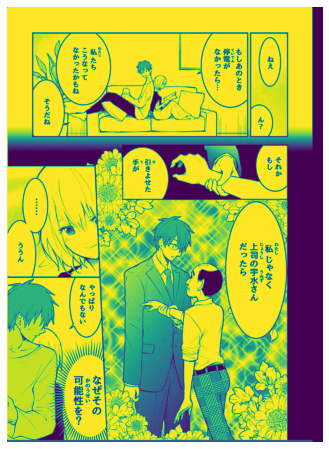

In [49]:
draw_image(x[1][0])

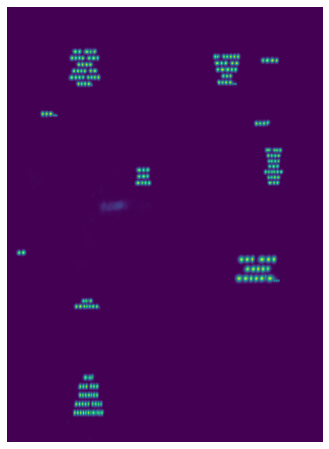

In [50]:

draw_image(y[1][0])

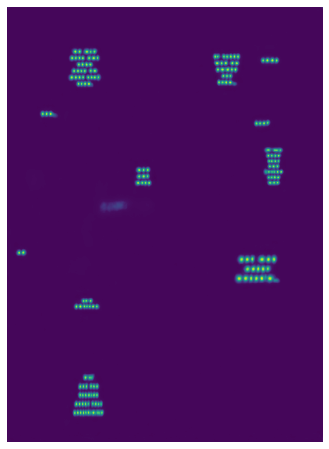

In [52]:
draw_image( what[1][0])